# Euro exchange rates (1999-2021).

Our goal for that project is to show Euro-USD exchange rates between 1999 and 2021 year and how it was changing because of presidency in US. <br>
We will be working on dataset from European Central Bank source thanks to __Daria Chemkaeva__ who put the data together.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt
import numpy as np
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

First 5 rows

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


Last 5 rows

In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


Every column is a different currency. We will list them below.

In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

There are 41 columns(currencies) and 5699 rows(days).

In [6]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

Above we rename '\[US dollar]\' and 'Period\Unit' with 'US_dollar' and 'Time'. 
Also changed 'Time' column to a datetime data type and sorted it. <br>
We will isolate 'Time' and 'US_dollar' columns.

In [7]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

In [8]:
exchange_rates['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
0.8935     1
1.2789     1
1.4324     1
1.3564     1
1.4393     1
Name: US_dollar, Length: 3528, dtype: int64

Looking into 'US_dollar' column we can notice that 62 rows has '-' value. We will drop those rows.

In [9]:
euro_to_dollar=euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar']=euro_to_dollar['US_dollar'].astype(float)

In [10]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1268    6
1.3373    6
         ..
1.4639    1
1.5206    1
1.3272    1
0.8591    1
0.9375    1
Name: US_dollar, Length: 3527, dtype: int64

Now our task will be to show the changing rate on a plot.

In [11]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

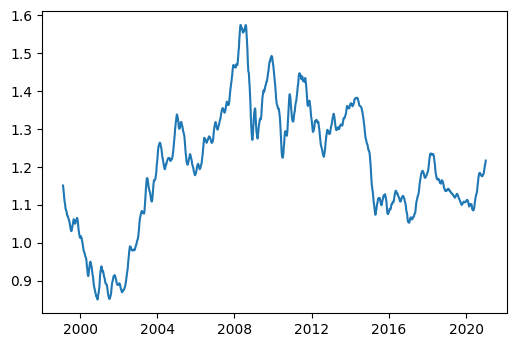

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
5694   2021-01-04
5695   2021-01-05
5696   2021-01-06
5697   2021-01-07
5698   2021-01-08
Name: Time, Length: 5637, dtype: datetime64[ns]


In [12]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.show()
print(euro_to_dollar['Time'])

The pick of exchange range was between 2007 and 2010. <br>
Our goal was to show exchange range during each presidency in US.
Through all these years, US had 3 presidents: <br>
`George W. Bush`(2001-2009) <br>
`Barack Obama`(2009-2017) <br>
`Donald Trump`(2017-2021) <br>
Let's visualize it now.

In [13]:
euro_to_dollar['Year'] = euro_to_dollar['Time'].dt.year
bush=euro_to_dollar[euro_to_dollar['Year'].between(2001, 2008, inclusive='left')]
obama=euro_to_dollar[euro_to_dollar['Year'].between(2009, 2016, inclusive='left')]
trump=euro_to_dollar[euro_to_dollar['Year'].between(2017, 2020, inclusive='left')]


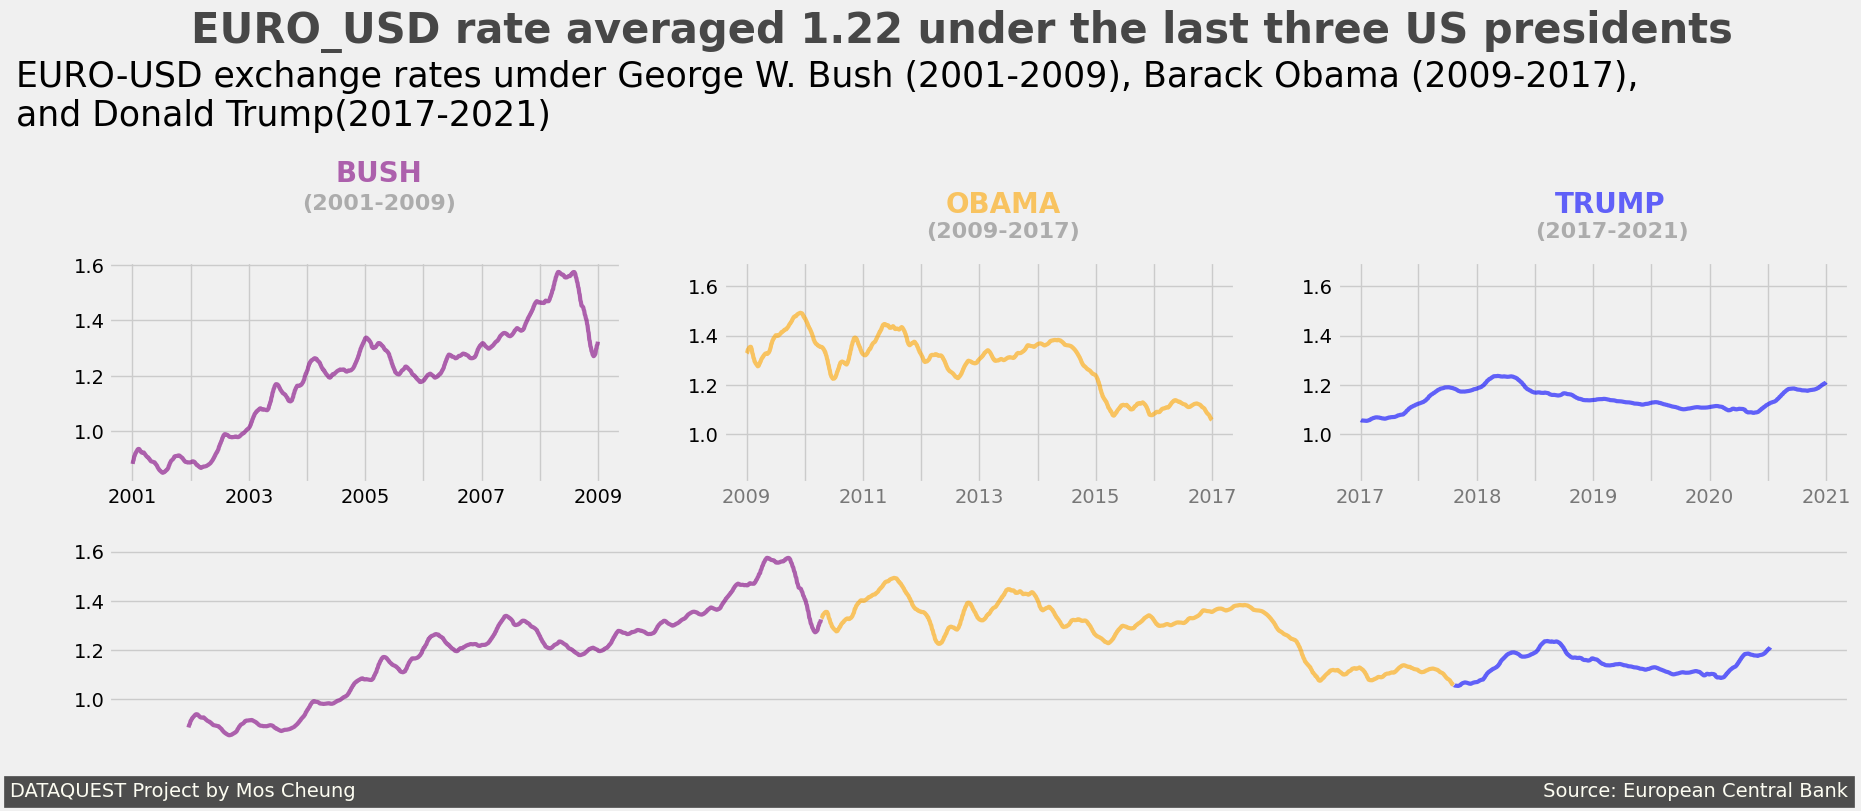

In [14]:
style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,6))
gs = fig.add_gridspec(2,3)
ax1=fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

ax1.text(np.datetime64('2002-01-01 00:00:00'), 2.4, s='EURO_USD rate averaged 1.22 under the last three US presidents', size=30, weight='bold', alpha=0.7)
ax1.text(np.datetime64('1999-01-01 00:00:00'), 2.1, s='EURO-USD exchange rates umder George W. Bush (2001-2009), Barack Obama (2009-2017), \nand Donald Trump(2017-2021)',
        size=25)
ax1.plot(bush['Time'], bush['rolling_mean'], color='purple', alpha=.6, linewidth=3)

ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'])
ax1.set_yticklabels(['', 1.0, 1.2, 1.4, 1.6])
ax1.text(np.datetime64('2004-07-01 00:00:00'), 1.9, s='BUSH', weight='bold',color='purple', alpha=.6, size=20)
ax1.text(np.datetime64('2003-12-01 00:00:00'), 1.8, s='(2001-2009)', weight='bold', color='grey', alpha=.6, size=16)

ax2.plot(obama['Time'], obama['rolling_mean'], color='orange', alpha=.6, linewidth=3)
ax2.set_ylim([.8, 1.7])
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'], alpha=.5)
ax2.set_yticklabels(['', 1.0, 1.2, 1.4, 1.6])
ax2.text(np.datetime64('2012-06-01 00:00:00'), 1.9, s='OBAMA', alpha=.6, weight='bold', color='orange', size=20)
ax2.text(np.datetime64('2012-02-01 00:00:00'), 1.8, s='(2009-2017)', alpha=.6, weight='bold', color='grey', size=16)

ax3.plot(trump['Time'], trump['rolling_mean'], color ='blue', alpha=.6, linewidth=3)
ax3.set_ylim([.8, 1.7])
ax3.set_xticklabels(['2017','','2018','','2019','','2020','','2021'], alpha=.5)
ax3.set_yticklabels(['', 1.0, 1.2, 1.4, 1.6])
ax3.text(np.datetime64('2018-09-01 00:00:00'), 1.9, s='TRUMP', alpha=.6, weight='bold', color='blue', size=20)
ax3.text(np.datetime64('2018-07-01 00:00:00'), 1.8, s='(2017-2021)', alpha=.6, weight='bold', color='grey', size=16)

ax4.set_ylim([.8, 1.7])
ax4.set_yticklabels(['', 1.0, 1.2, 1.4, 1.6])
ax4.plot(bush['Time'],bush['rolling_mean'], color='purple', alpha=.6, linewidth=3)
ax4.plot(obama['Time'], obama['rolling_mean'], color='orange', alpha=.6, linewidth=3)
ax4.plot(trump['Time'], trump['rolling_mean'], color ='blue', alpha=.6, linewidth=3)
ax4.set_xticklabels([])
ax4.grid(axis='x')
ax4.text(np.datetime64('1998-10-01 00:00:00'), .6,
         backgroundcolor='#4d4d4d', color='#fcfcf1',
         s='DATAQUEST Project by Mos Cheung' + ' '*190 + 'Source: European Central Bank')
plt.show()

## Summary
As you can see on a graph, the best EURO - USD rate was during George W. Bush presidency, and the worst when Donald Trump was on charge.